# KNN Regression

KNN models can also be run as regressions.  Instead of the model choosing the most popular categorical response, the model averages all of the votes.  If the implementation uses a weighted distance function, then the weighted average is used to predict the value.

We will build off of the previous music dataset.  For this KNN regression model, we will predict the BPM of each song, given the loudness, first, and then adding in duration.

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

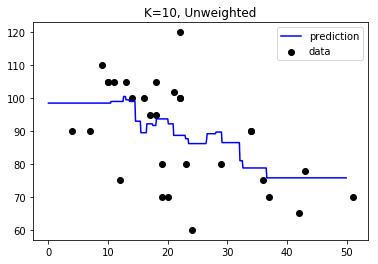

In [4]:
# Instantiating a k=10 regressor model with just Loudness data
knn = KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(music['loudness'])
Y = music['bpm']
knn.fit(X, Y)

# Setting up the prediction line
T = np.arange(0, 50, 0.1)[:, np.newaxis]

Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='b', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

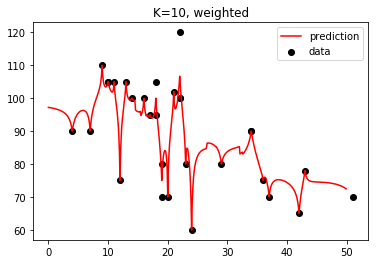

In [5]:
# Instantiating the same model, but with a weighted distance function
knn_w = KNeighborsRegressor(n_neighbors=10, weights='distance')
knn_w.fit(X, Y)

Y_w = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_w, c='r', label='prediction')
plt.legend()
plt.title('K=10, weighted')
plt.show()

The weighted model grossly overfits to the data and occilates rapidly.  This is because the inverse weighting function decays very rapidly.


### Validating KNN Models

Let's do some cross validation of these models to assess the efficacy of each.

In [6]:
# Running 5-fold cross validation on each model
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

score_w = cross_val_score(knn_w, X, Y, cv=5)
print('Weighted Accuracy: %0.2f (+/- %0.2f)' % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.18 (+/- 0.66)
Weighted Accuracy: 0.11 (+/- 0.94)


These are not great models.  Let's try adding in the duration data and see what happens. We'll also normalize the data too.

In [101]:
# Instantiating a normalized KNN model, k=7

X_1 = pd.DataFrame({
    'loudness': scipy.stats.zscore(music['loudness']),
    'duration': scipy.stats.zscore(music['duration'])
})
Y_1 = scipy.stats.zscore(music['bpm'])

T_1 = np.arange(-3, 3, 0.2).reshape(-1,2)

knn_norm = KNeighborsRegressor(n_neighbors=7).fit(X_1, Y_1)
Y_1pred = knn_norm.predict(T_1)

In [102]:
score_1 = cross_val_score(knn_norm, X_1, Y_1, cv=5)
print(score_1)
print('Normalized Accuracy: %0.2f (+/- %0.2f)' % (score_1.mean(), score_1.std()))

[-0.09714039  0.24172657 -0.29046931 -2.05188665  0.07248038]
Normalized Accuracy: -0.43 (+/- 0.83)


The **R^2** of the normalized, k=7 KNN model with both `loudness` and `duration` is marginally better than the previous two models, but the cross validation shows that the model has a very poor fit.